In [1]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20
taulist = np.linspace(0,10.0,200)
a = qp.destroy(N)
H = 2*np.pi*a.dag()*a

# collapse operator
G1 = 0.75
n_th = 2.00  # bath temperature in terms of excitation number
c_ops = [np.sqrt(G1*(1+n_th)) * a, np.sqrt(G1*n_th) * a.dag()]

# start with a coherent state
rho0 = qp.coherent_dm(N,2.0)

# first calculate the occupation number as a function of time
n = qp.mesolve(H, rho0, taulist, c_ops, [a.dag() * a]).expect[0]

# calculate the correlation function G1 and normalize with n to obtain g1
G1 = qp.correlation(H, rho0, None, taulist, c_ops, a.dag(), a)
g1 = G1 / np.sqrt(n[0] * n)

/Users/sunmeng/Bin/anaconda3/lib/python3.7/site-packages/qutip/correlation.py:747: FutureWarning: correlation() now legacy, please use correlation_2op_2t()
  FutureWarning)


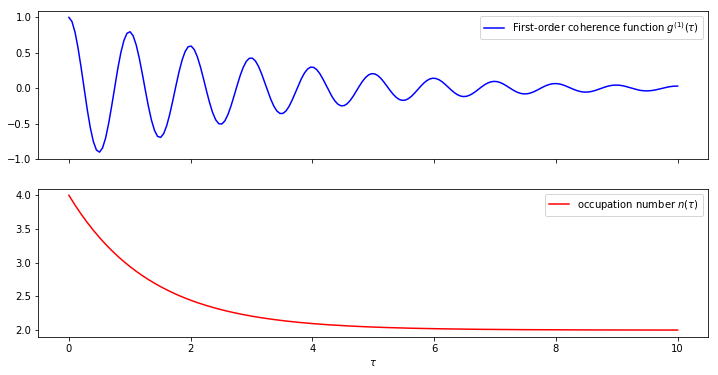

In [3]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,6))

axes[0].plot(taulist, np.real(g1), 'b', label=r'First-order coherence function $g^{(1)}(\tau)$')
axes[1].plot(taulist, np.real(n),  'r', label=r'occupation number $n(\tau)$')
axes[0].legend()
axes[1].legend()
axes[1].set_xlabel(r'$\tau$');

In [4]:
def correlation_ss_gtt(H, tlist, c_ops, a_op, b_op, c_op, d_op, rho0=None):
    """
    Calculate the correlation function <A(0)B(tau)C(tau)D(0)>

    (ss_gtt = steadystate general two-time)
    
    See, Gardiner, Quantum Noise, Section 5.2.1

    .. note::
        Experimental. 
    """
    #if rho0 == None:
    #    rho0 = qp.steadystate(H, c_ops)

    return qp.mesolve(H, d_op * rho0 * a_op, tlist, c_ops, [b_op * c_op]).expect[0]

In [5]:

# calculate the correlation function G2 and normalize with n to obtain g2
G2 = correlation_ss_gtt(H, taulist, c_ops, a.dag(), a.dag(), a, a, rho0=rho0)
g2 = G2 / n**2

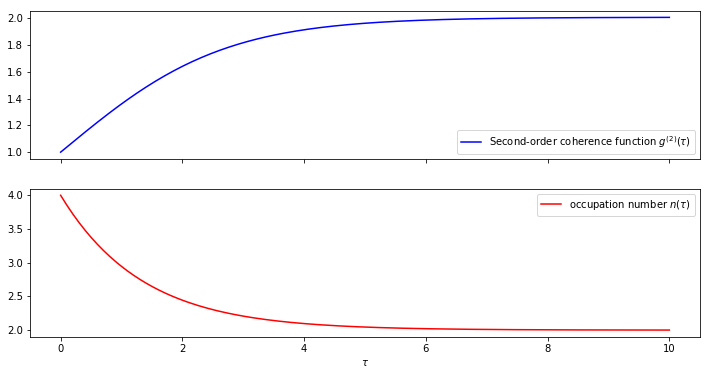

In [6]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,6))

axes[0].plot(taulist, np.real(g2), 'b', label=r'Second-order coherence function $g^{(2)}(\tau)$')
axes[1].plot(taulist, np.real(n),  'r', label=r'occupation number $n(\tau)$')
axes[0].legend(loc=0)
axes[1].legend()
axes[1].set_xlabel(r'$\tau$');